# Ejercicio 1: *Clustering*

### 1. Importa los datos

Importa el dataset *drugLibTrain_raw.csv*. Se trata de un *dataset* con diferentes fármacos, sus efectos y ratings de los clientes.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('./data/drugLibTrain_raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 194.3+ KB


In [57]:
#Columnas con valores nulos
[col for col in df.columns if df[col].isnull().any()]

['condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview']

In [58]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### 2. Análisis descriptivo

Quedate únicamente con las columnas que podamos manejar: columnas numéricas y columnas categoricas con pocas categorias (menos de 10).

In [3]:
numericas=[col for col in df.columns if df[col].dtype in ['int64','float64']]
categoricas=[col for col in df.columns if df[col].nunique()<10 and df[col].dtype=='object']

mis_columnas=numericas+categoricas
data=df[mis_columnas]
data.head()

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects


In [60]:
data.info() #No tenemos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.9+ KB


Como tenemos 3 variables es posible dibujar.

In [61]:
fig=px.scatter_3d(data,x='rating',y='effectiveness',z='sideEffects')
fig.show()

### 3. Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [62]:
data.head(2)

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.9+ KB


#### Opcion 1: Ordinal encoding.

In [64]:
#Guardamos en una lista las columnas categoritas de nuestro dataset
s=(data.dtypes=='object')
object_cols=list(s[s].index)
object_cols

['effectiveness', 'sideEffects']

In [65]:
data_1=data.copy()
ordinal_encoding=OrdinalEncoder()
data_1[object_cols]=ordinal_encoding.fit_transform(data_1[object_cols])
data_1[object_cols].nunique() #Cuantos grupos hay en las variables categoricas

effectiveness    5
sideEffects      5
dtype: int64

In [66]:
data_1.head()

,rating,effectiveness,sideEffects
0,4,1.0,1.0
1,1,1.0,4.0
2,10,1.0,3.0
3,3,3.0,1.0
4,2,3.0,4.0


Opcion 2: Dummies.

 Como tenemos variables ordinales tiene sentido cuantificar variables.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.9+ KB


In [6]:
data.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [11]:
data_1=data.copy()

eff={'Ineffective':0,
    'Marginally Effective':1,
    'Moderately Effective':2,
    'Considerably Effective':3,
    'Highly Effective':4}

data_1['effectiveness']=data_1['effectiveness'].map(eff)

In [12]:
df.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [13]:
side={'No Side Effects':0,
    'Mild Side Effects':1, 
    'Moderate Side Effects':2,
    'Severe Side Effects':3,
    'Extremely Severe Side Effects':4}

data_1['sideEffects']=data_1['sideEffects'].map(side)

In [14]:
data_1.head()

,rating,effectiveness,sideEffects
0,4,4,1
1,1,4,3
2,10,4,0
3,3,1,1
4,2,1,3


### 4. Construye un algoritmo *K-Means* 

Evalua cual es el mejor valor de *k*. Utiliza `silhouette_score` para evaluar cual es la mejor $k$.

In [15]:
kmeans_k=[KMeans(n_clusters=k,random_state=42,n_init='auto').fit(data_1) for k in range (1,30)]
inertias=[model.inertia_ for model in kmeans_k]

Text(0, 0.5, 'Inertia')

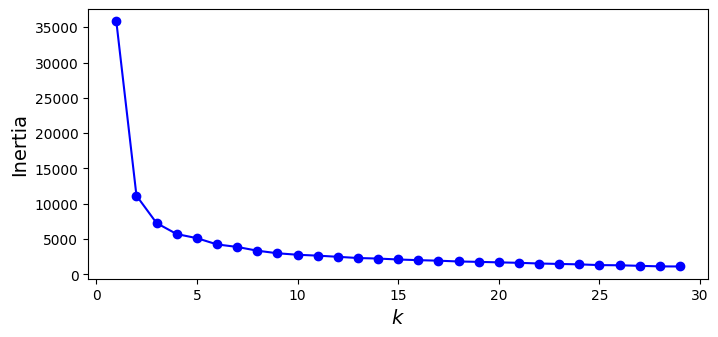

In [17]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

Observando la imagen vemos que el k optimo es igual a 2. **k=2**. Lo podemos calcular tambien con el Silhouette score:

In [19]:
kmeans_k=[KMeans(n_clusters=k,random_state=42,n_init='auto').fit(data_1) for k in range (1,30)]
scores=[silhouette_score(data_1,model.labels_)for model in kmeans_k[1:]]

Text(0, 0.5, 'Silhouette score')

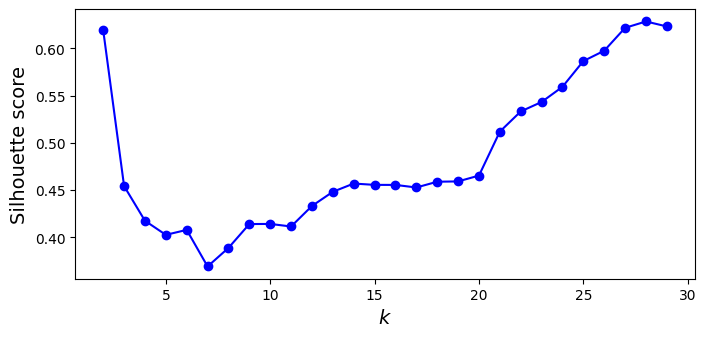

In [20]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 30), scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

Entrenamiento:

In [21]:
k=2
kmeans=KMeans(n_clusters=k, n_init='auto', random_state=42).fit(data_1)

In [22]:
silhouette_score(data_1,kmeans.labels_)

0.6190969508782411

In [23]:
kmeans.cluster_centers_ 

array([[8.56961471, 3.42250438, 0.88047285],
       [2.66707169, 1.58444714, 2.48238153]])

In [24]:
kmeans.inertia_

11137.736723639311

In [25]:
kmeans.labels_ #el cluster que asigna a cada punto

array([1, 1, 0, ..., 1, 0, 1])

In [26]:
resultado=kmeans.labels_
valores_unicos,cantidad=np.unique(resultado, return_counts=True)
cantidad

array([2284,  823], dtype=int64)

In [95]:
2193+914

3107

Comprueba los resultados y muestra en un *pie plot* la distribución de los distintos *clusters*.

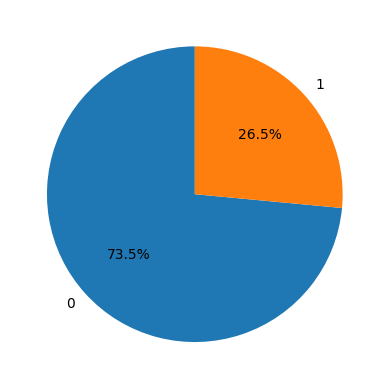

In [27]:
plt.pie(list(cantidad), labels=list(valores_unicos),autopct='%1.1f%%', startangle=90);

### Conclusiones

In [28]:
data_1.head()

,rating,effectiveness,sideEffects
0,4,4,1
1,1,4,3
2,10,4,0
3,3,1,1
4,2,1,3


In [30]:
data_1['Cluster']=kmeans.labels_
data_1.head()

,rating,effectiveness,sideEffects,Cluster
0,4,4,1,1
1,1,4,3,1
2,10,4,0,0
3,3,1,1,1
4,2,1,3,1


Agrupamos por clusters para ver que medicamento esta en cada cluster y calculamos la media, por ejemplo.

In [32]:
data_1.groupby('Cluster').mean()

,rating,effectiveness,sideEffects
Cluster,,,
0,8.569615,3.422504,0.880473
1,2.667072,1.584447,2.482382


Segun esto los medicamentos 'buenos estan en el cluster 0 y los malos en el 1.

In [33]:
fig = px.box(data_1, x='Cluster', y='sideEffects', color ='Cluster')
fig.show()

In [34]:
fig = px.box(data_1, x='Cluster', y='effectiveness', color ='Cluster')
fig.show()